In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 100)

In [1]:
import sqlite3
conn = sqlite3.connect('AdventureWorks-sqlite.db')
conn.text_factory = lambda x: str(x, "utf-8", "ignore") 

cursor = conn.cursor()

In [5]:
query = '''SELECT * FROM SalesOrderHeader'''
cursor.execute(query)
result = cursor.fetchall()
sales_header = pd.DataFrame(result, columns=[x[0] for x in cursor.description])

In [14]:
query = '''SELECT * FROM SalesOrderDetail'''
cursor.execute(query)
result = cursor.fetchall()
sales_detail = pd.DataFrame(result, columns=[x[0] for x in cursor.description])

In [8]:
query = '''SELECT * FROM Product'''
cursor.execute(query)
result = cursor.fetchall()
product = pd.DataFrame(result, columns=[x[0] for x in cursor.description])

In [31]:
product.head()

,ProductID,Name,ProductNumber,Color,StandardCost,ListPrice,Size,Weight,ProductCategoryID,ProductModelID,SellStartDate,SellEndDate,DiscontinuedDate,ThumbNailPhoto,ThumbnailPhotoFileName,rowguid,ModifiedDate
0,680,"HL Road Frame - Black, 58",FR-R92B-58,Black,1059.3100,1431.50,58,1016.04,18,6,2002-06-01 00:00:00.000,,,47494638396150003100F7000000000080000000800080...,no_image_available_small.gif,43DD68D6-14A4-461F-9069-55309D90EA7E,2008-03-11 10:01:36.827
1,706,"HL Road Frame - Red, 58",FR-R92R-58,Red,1059.3100,1431.50,58,1016.04,18,6,2002-06-01 00:00:00.000,,,47494638396150003100F7000000000080000000800080...,no_image_available_small.gif,9540FF17-2712-4C90-A3D1-8CE5568B2462,2008-03-11 10:01:36.827
2,707,"Sport-100 Helmet, Red",HL-U509-R,Red,13.0863,34.99,,,35,33,2005-07-01 00:00:00.000,,,47494638396150003100F7000000000080000000800080...,no_image_available_small.gif,2E1EF41A-C08A-4FF6-8ADA-BDE58B64A712,2008-03-11 10:01:36.827
3,708,"Sport-100 Helmet, Black",HL-U509,Black,13.0863,34.99,,,35,33,2005-07-01 00:00:00.000,,,47494638396150003100F7000000000080000000800080...,no_image_available_small.gif,A25A44FB-C2DE-4268-958F-110B8D7621E2,2008-03-11 10:01:36.827
4,709,"Mountain Bike Socks, M",SO-B909-M,White,3.3963,9.50,M,,27,18,2005-07-01 00:00:00.000,2006-06-30 00:00:00.000,,47494638396150003100F7000000000080000000800080...,no_image_available_small.gif,18F95F47-1540-4E02-8F1F-CC1BCB6828D0,2008-03-11 10:01:36.827


In [32]:
sales_header.head()

,SalesOrderID,RevisionNumber,OrderDate,DueDate,ShipDate,Status,OnlineOrderFlag,SalesOrderNumber,PurchaseOrderNumber,AccountNumber,CustomerID,ShipToAddressID,BillToAddressID,ShipMethod,CreditCardApprovalCode,SubTotal,TaxAmt,Freight,TotalDue,Comment,rowguid,ModifiedDate
0,71774,2,2008-06-01 00:00:00.000,2008-06-13 00:00:00.000,2008-06-08 00:00:00.000,5,0,SO71774,PO348186287,10-4020-000609,29847,1092,1092,CARGO TRANSPORT 5,,880.3484,70.4279,22.0087,972.7850,,89E42CDC-8506-48A2-B89B-EB3E64E3554E,2008-06-08 00:00:00.000
1,71776,2,2008-06-01 00:00:00.000,2008-06-13 00:00:00.000,2008-06-08 00:00:00.000,5,0,SO71776,PO19952192051,10-4020-000106,30072,640,640,CARGO TRANSPORT 5,,78.8100,6.3048,1.9703,87.0851,,8A3448C5-E677-4158-A29B-DD33069BE0B0,2008-06-08 00:00:00.000
2,71780,2,2008-06-01 00:00:00.000,2008-06-13 00:00:00.000,2008-06-08 00:00:00.000,5,0,SO71780,PO19604173239,10-4020-000340,30113,653,653,CARGO TRANSPORT 5,,38418.6895,3073.4952,960.4672,42452.6519,,A47665D2-7AC9-4CF3-8A8B-2A3883554284,2008-06-08 00:00:00.000
3,71782,2,2008-06-01 00:00:00.000,2008-06-13 00:00:00.000,2008-06-08 00:00:00.000,5,0,SO71782,PO19372114749,10-4020-000582,29485,1086,1086,CARGO TRANSPORT 5,,39785.3304,3182.8264,994.6333,43962.7901,,F1BE45A5-5C57-4A50-93C6-5F8BE44CB7CB,2008-06-08 00:00:00.000
4,71783,2,2008-06-01 00:00:00.000,2008-06-13 00:00:00.000,2008-06-08 00:00:00.000,5,0,SO71783,PO19343113609,10-4020-000024,29957,992,992,CARGO TRANSPORT 5,,83858.4261,6708.6741,2096.4607,92663.5609,,7DB2329E-6446-42A8-8915-9C8370B68ED8,2008-06-08 00:00:00.000


In [33]:
sales_detail.head()

,SalesOrderID,SalesOrderDetailID,OrderQty,ProductID,UnitPrice,UnitPriceDiscount,LineTotal,rowguid,ModifiedDate
0,71774,110562,1,836,356.898,0.0,356.898,E3A1994C-7A68-4CE8-96A3-77FDD3BBD730,2008-06-01 00:00:00.000
1,71774,110563,1,822,356.898,0.0,356.898,5C77F557-FDB6-43BA-90B9-9A7AEC55CA32,2008-06-01 00:00:00.000
2,71776,110567,1,907,63.900,0.0,63.900,6DBFE398-D15D-425E-AA58-88178FE360E5,2008-06-01 00:00:00.000
3,71780,110616,4,905,218.454,0.0,873.816,377246C9-4483-48ED-A5B9-E56F005364E0,2008-06-01 00:00:00.000
4,71780,110617,2,983,461.694,0.0,923.388,43A54BCD-536D-4A1B-8E69-24D083507A14,2008-06-01 00:00:00.000


In [34]:
sales = pd.merge(sales_header, sales_detail, on='SalesOrderID')

In [35]:
sales.shape

(542, 30)

In [40]:
sales['OrderDate'] = pd.to_datetime(sales['OrderDate'])
sales['Year'] = sales['OrderDate'].dt.year
sales['Month'] = sales['OrderDate'].dt.month

In [41]:
yearly_sales = sales.groupby('Year')['TotalDue'].sum().reset_index()
monthly_sales = sales.groupby('Month')['TotalDue'].sum().reset_index()

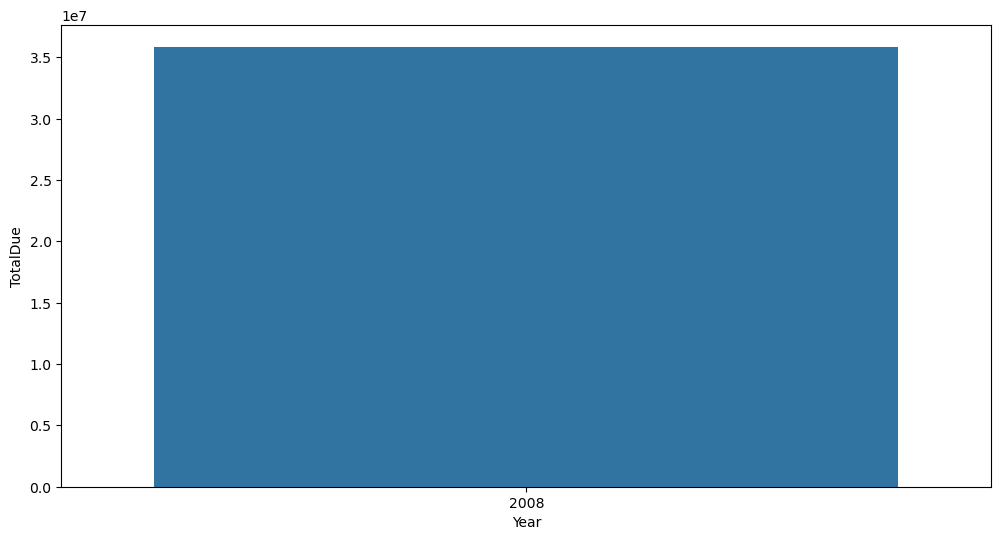

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_sales, x='Year', y='TotalDue');

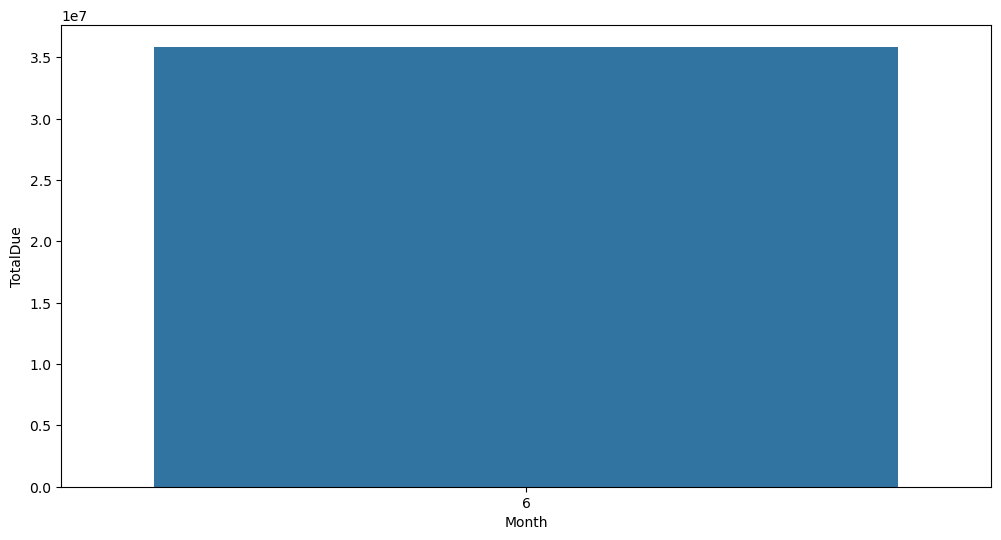

In [43]:
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales, x='Month', y='TotalDue');